In [33]:
# import all the important libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix,ConfusionMatrixDisplay


In [34]:
import numpy as np
import pandas as pd

In [35]:
df = pd.read_csv('data/personality_datasert.csv')
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,3.0,Yes,2.0,0.0,Introvert


In [36]:
df.drop('Drained_after_socializing',inplace=True,axis=1)
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,4.0,0.0,Introvert
2898,11.0,Yes,1.0,3.0,2.0,0.0,Introvert


In [37]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [38]:
X

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
0,4.0,No,4.0,6.0,13.0,5.0
1,9.0,Yes,0.0,0.0,0.0,3.0
2,9.0,Yes,1.0,2.0,5.0,2.0
3,0.0,No,6.0,7.0,14.0,8.0
4,3.0,No,9.0,4.0,8.0,5.0
...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,6.0,6.0
2896,3.0,No,8.0,3.0,14.0,9.0
2897,4.0,Yes,1.0,1.0,4.0,0.0
2898,11.0,Yes,1.0,3.0,2.0,0.0


In [39]:
y

0       Extrovert
1       Introvert
2       Introvert
3       Extrovert
4       Extrovert
          ...    
2895    Extrovert
2896    Extrovert
2897    Introvert
2898    Introvert
2899    Extrovert
Name: Personality, Length: 2900, dtype: object

In [40]:
X

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
0,4.0,No,4.0,6.0,13.0,5.0
1,9.0,Yes,0.0,0.0,0.0,3.0
2,9.0,Yes,1.0,2.0,5.0,2.0
3,0.0,No,6.0,7.0,14.0,8.0
4,3.0,No,9.0,4.0,8.0,5.0
...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,6.0,6.0
2896,3.0,No,8.0,3.0,14.0,9.0
2897,4.0,Yes,1.0,1.0,4.0,0.0
2898,11.0,Yes,1.0,3.0,2.0,0.0


In [41]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

ss = StandardScaler()
oe = OneHotEncoder()
preprocessing = ColumnTransformer([
    ('OneHotEncoder',oe,cat_features),
    ('StandardScaler',ss,num_features)
]) 

In [42]:
X = preprocessing.fit_transform(X)
X

array([[ 1.        ,  0.        , -0.14701445, ...,  1.35061257,
         1.59067969,  0.49610435],
       [ 0.        ,  1.        ,  1.30622592, ..., -1.35061257,
        -1.48143661, -0.19519859],
       [ 0.        ,  1.        ,  1.30622592, ..., -0.45020419,
        -0.29985342, -0.54085006],
       ...,
       [ 0.        ,  1.        , -0.14701445, ..., -0.90040838,
        -0.53617006, -1.23215301],
       [ 0.        ,  1.        ,  1.88752207, ...,  0.        ,
        -1.00880333, -1.23215301],
       [ 1.        ,  0.        , -0.43766252, ...,  1.35061257,
        -0.06353678,  1.87871024]], shape=(2900, 7))

In [43]:
y.unique()

array(['Extrovert', 'Introvert'], dtype=object)

In [44]:
y = y.map(lambda x: 1 if x == 'Introvert' else 0)
y

0       0
1       1
2       1
3       0
4       0
       ..
2895    0
2896    0
2897    1
2898    1
2899    0
Name: Personality, Length: 2900, dtype: int64

In [46]:

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.33,random_state=0)
X_train.shape, X_test.shape

((957, 7), (1943, 7))

In [47]:
def evaluate_basic_classification(y_true, y_pred, plot=True):
    print("📋 Classification Report:")
    print(classification_report(y_true, y_pred))

    # Summary metrics
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)

    print(f"✅ Accuracy       : {acc:.4f}")
    print(f"✅ Precision (macro): {precision:.4f}")
    print(f"✅ Recall (macro)   : {recall:.4f}")
    print(f"✅ F1 Score (macro) : {f1:.4f}")

    # Confusion Matrix
    if plot:
        ConfusionMatrixDisplay.from_predictions(y_true, y_pred, cmap='Blues')
        plt.title("Confusion Matrix")
        plt.show()


Logistic Regression
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       985
           1       0.93      0.92      0.93       958

    accuracy                           0.93      1943
   macro avg       0.93      0.93      0.93      1943
weighted avg       0.93      0.93      0.93      1943

✅ Accuracy       : 0.9290
✅ Precision (macro): 0.9291
✅ Recall (macro)   : 0.9289
✅ F1 Score (macro) : 0.9290


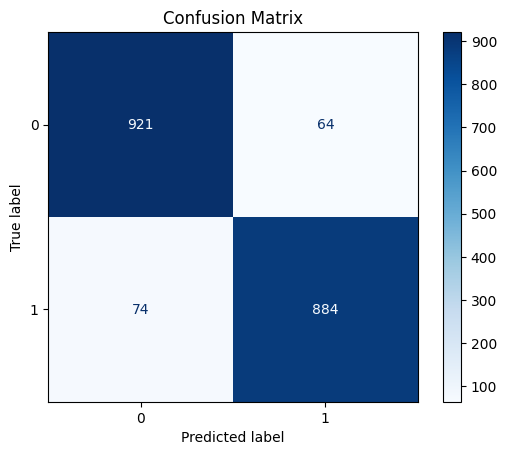

----------------------------------




e:\find who is intorver\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:47:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classifier
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       985
           1       0.92      0.92      0.92       958

    accuracy                           0.92      1943
   macro avg       0.92      0.92      0.92      1943
weighted avg       0.92      0.92      0.92      1943

✅ Accuracy       : 0.9182
✅ Precision (macro): 0.9182
✅ Recall (macro)   : 0.9181
✅ F1 Score (macro) : 0.9181


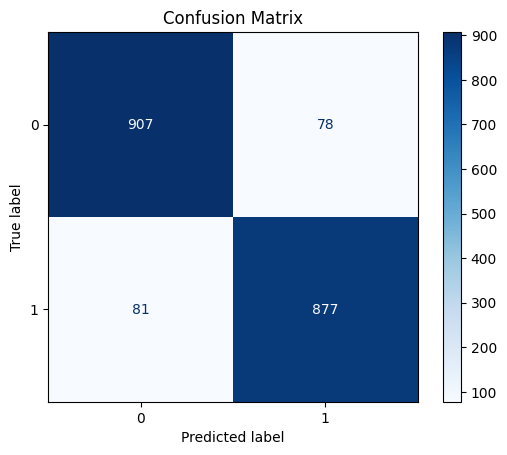

----------------------------------


CatBoost Classifier
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       985
           1       0.93      0.94      0.94       958

    accuracy                           0.94      1943
   macro avg       0.94      0.94      0.94      1943
weighted avg       0.94      0.94      0.94      1943

✅ Accuracy       : 0.9372
✅ Precision (macro): 0.9372
✅ Recall (macro)   : 0.9373
✅ F1 Score (macro) : 0.9372


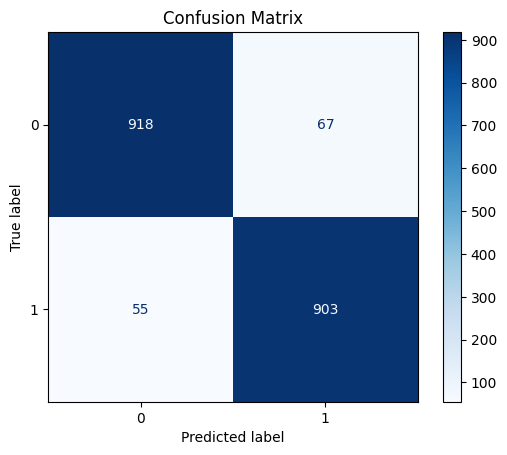

----------------------------------


Random Forest Classifier
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       985
           1       0.93      0.93      0.93       958

    accuracy                           0.93      1943
   macro avg       0.93      0.93      0.93      1943
weighted avg       0.93      0.93      0.93      1943

✅ Accuracy       : 0.9321
✅ Precision (macro): 0.9321
✅ Recall (macro)   : 0.9320
✅ F1 Score (macro) : 0.9320


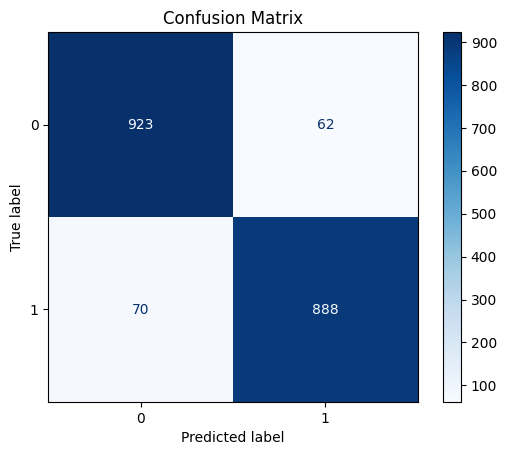

----------------------------------


K-Nearest Neighbors
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       985
           1       0.92      0.92      0.92       958

    accuracy                           0.92      1943
   macro avg       0.92      0.92      0.92      1943
weighted avg       0.92      0.92      0.92      1943

✅ Accuracy       : 0.9249
✅ Precision (macro): 0.9249
✅ Recall (macro)   : 0.9248
✅ F1 Score (macro) : 0.9248


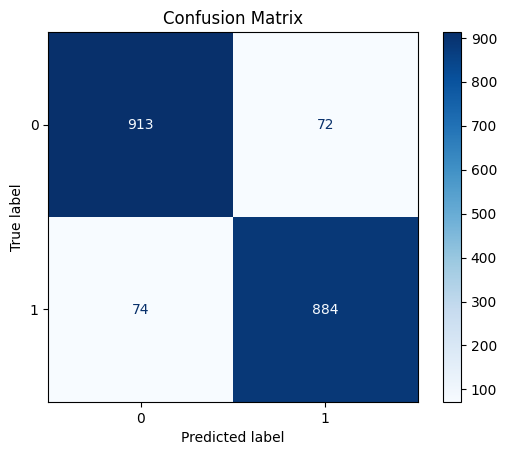

----------------------------------


Support Vector Classifier
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       985
           1       0.93      0.94      0.94       958

    accuracy                           0.94      1943
   macro avg       0.94      0.94      0.94      1943
weighted avg       0.94      0.94      0.94      1943

✅ Accuracy       : 0.9393
✅ Precision (macro): 0.9392
✅ Recall (macro)   : 0.9393
✅ F1 Score (macro) : 0.9393


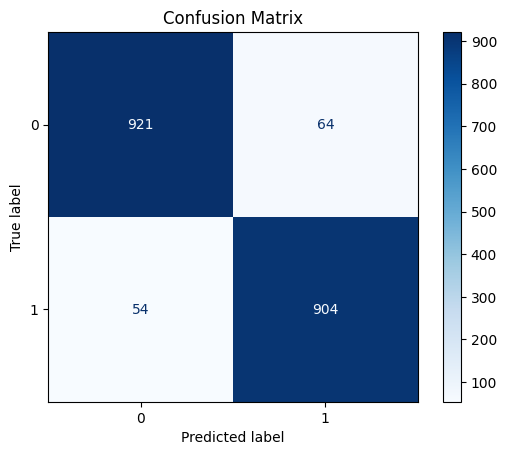

----------------------------------




In [48]:
models = {
    'Logistic Regression'      : LogisticRegression(max_iter=1000, random_state=42),
    'XGBoost Classifier'       : XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'CatBoost Classifier'      : CatBoostClassifier(verbose=0, random_state=42),
    'Random Forest Classifier' : RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors'      : KNeighborsClassifier(n_neighbors=3),
    'Support Vector Classifier': SVC(probability=True, random_state=42)
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    print(list(models.keys())[i])
    evaluate_basic_classification(y_test, y_test_pred)
  
    model_list.append(list(models.keys())[i])    
    print('----------------------------------')
    print('\n')